# Exploring Google's Effect on Memory with the Testing Effect 

# Background

Google has risen in its role as an education tool with the pandemic. In 2005, Google was already 45% of students’ first choice of information seeking method (Griffiths & Brophy, 2005), and that percentage is likely to have increased since. This provokes the question of how good is Google as a learning tool and whether it actually has a positive influence on learning. Learning by testing is the current superior learning strategy supported by the testing effect: a widely studied phenomenon wherein testing aids the long-term retention of knowledge (Roediger & Karpicke, 2006). A previously conducted study showed a possible advatange of using Google to learn with better knowledge retenetion after a 2-day delay instead of learning by testing. Thus, this 2nd study was conducted attempting to replicate the Google advantage with a different set of learning material. We aim to answer the question: is there an advantage of using Google to learn compared to learning by testing? 



# Variables

**Independent Variable:** 
 - **Learning Strategy:** (cond) Learning strategy assigned to participants (G: learning with Google (search phrases not provided), GC: learning with Google (search phrases provided), T: learning by testing, R: learning by restudying)

**Dependent Variable Measure:** 
- **Accuracy:** (acc) Final assessment accuracy adjusted for prior knowledge of the learning material, calculated with the formula (final raw score - score for known knowledge) / (10 - number of known knowledge)

**Demographic Measures:**
 - **Sex:** (gender) As reported by participants (options: Male, Female, Non-binary / third gender)
 - **Race/Ethnicity:** (ethnicity) As reported by participants (options: White, Hispanic or Latino, Black or African American, Native American or American Indian, Asian / Pacific Islander, Other)
 - **Education:** (edu) As reported by participants (options: No schooling completed, Up Through 8th grade only, Some high school, no diploma, High school graduate, diploma or the equivalent (e.g., GED), Some college credit, no degree, Associate degree, Bachelor's degree, Master's degree, Doctorate degree)
 
**Study Experience Measures:**
 - **Difficulty Rating of the Final Assessment:** (diff_test) As reported by participants (likert scale 0 [extremely easy] - 10 [extremely difficult])
 - **Difficulty Rating of the Learning Material:** (diff_material) As reported by participants (likert scale 0 [very easy] - 10 [very difficult])
 - **Prediction of the Final Assessment Score:** (finalScorePredict) As reported by participants (0-10)
 - **Prior Knowledge:** (priorKnow) Number of learning material knew before the study as reported by participants (0-10)
 
**General Learning Style Measures:**
 - **Learning Style:** (LearningStyle) As reported by participants (likert scale 0 [all restudying] - 10 [all self-testing])
 - **Opinion on Learning by Testing vs. Learning by Restudying:** (opinion_on_testlearning) As reported by participants (likert scale 0 [Much less favorable towards self-testing] - 10 [A lot more favorable towards self-testing])
 - **Frequency Engaging in Open Book Exams:** (openBookExam) As reported by participants (likert scale 0 [NA] - 10 [Always])
 
**Technology Experience Measures:**
 - **Estimated Daily Phone Usage:** (phone) As reported by participants (in hours)
 - **Estimated Daily Tablet Usage:** (tablet) As reported by participants (in hours)
 - **Estimated Daily Laptop/Computer Usage:** (computer) As reported by participants (in hours)
 - **Default Search Engine is Google:** (Gdefault) As reported by participants (options: Yes, No)
 - **Estimated Daily Search Engine Uses:** (times_searchEngine) As reported by participants 
 
**Other Measures:**
 - **Effort for Arithmetic Questions Phase 1:** (pt1A) Number of Completed Arithmetic Questions after Phase 1
 - **Effort for Arithmetic Questions Phase 2:** (pt2A) Number of Completed Arithmetic Questions after Phase 2

# Hypothesis

It is hypothesized, given the results of the previous study, that there will be facilitation for memory when participants use Google to learn. We expect learning with Google to have a better learning outcome, as measured by accuracy on the 1-day delayed final assessment, than learning by restudying, however, we are unsure how it will compare to the testing effect.


# Data Plan Organization

 - Data Cleansing (Step by step):
   - Combine data from Part 1 and Part 2 of the study
   - Change column names into intelligble names
   - Exclude participants who did not complete the entire study
   - Exclude participants who completed Part 2 out of the set delay time
   - Exclude participants who did not meet the pre-registered inclusion criteria for analysis
       - Exclude those with too much prior knowledge
       - Exclude those who did not follow the the instruction for at least 70% of the learning material
       - Exclude those who used external aid in completing the final assessment
       - Exclude those whose offTask time was an outlier within their respective learning condition
   - Calculate the Accuracy and Effort for Arithmetic Questions variables for each participant

In [2]:
setwd("/Users/yuqizhou/Downloads")

#function ct.letters for checking final assessment answers
#code adapted from https://www.geeksforgeeks.org/count-common-characters-in-two-strings/
ct.letters <- function(s1, s2){
  
  #Find length of each string
  n1 = nchar(s1)
  # print(paste("n1:",n1))
  n2 = nchar(s2)
  # print(paste("n2:",n2))
  
  #To store the frequencies of characters of string s1 and s2
  freq1 = rep(0,26)
  freq2 = rep(0,26)
  
  #To store the count of valid pairs
  count = 0
  
  #Update the frequencies of the characters of string s1
  for (i in 1:n1){
    freq1[utf8ToInt(substring(s1,i,i)) - utf8ToInt("a")+1] = freq1[utf8ToInt(substring(s1,i,i)) - utf8ToInt("a")+1] + 1
  }
  #Update the frequencies of the characters of string s2
  for (i in 1:n2){
    freq2[utf8ToInt(substring(s2,i,i)) - utf8ToInt("a")+1] = freq2[utf8ToInt(substring(s2,i,i)) - utf8ToInt("a")+1] + 1
  }
  
  # Find the count of valid pairs
  for (i in 1:26){
    count = count + (min(freq1[i], freq2[i]));
  }
  
  return(count)
}

#function findOutWorkerId for creating a vector of workerId that needs to be excluded
findOutWorkerId <- function(id.out){
  vec = c()
  for (i in id.out) {
    vec = append(i, vec)
  }
  return(vec)
}

library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**Combine data from Part 1 and Part 2 of the Study & Exclude participants who did not complete the entire study**

In [3]:
p1 = read.csv("Thesis+Project+II+v6.1_April+19,+2022_15.25.csv")
wid1 = p1$workerId[21:length(p1$workerId)]
t1 = p1$EndDate[21:length(p1$EndDate)]

p2 = read.csv("Part+2+Honors+Thesis+II+v6.1_April+19,+2022_15.14.csv")
wid2 = p2$Q27[16:length(p2$Q27)]
t2 = p2$EndDate[16:length(p2$EndDate)]

completed = intersect(wid1,wid2)

pt1 <- p1 %>% filter(workerId %in% completed) %>% select("EndDate","Q20","Q22","Q23","Q24",
                                                       "Q229", "Q228",	"Q235",	"Q234",	"Q232",	"Q233",	"Q230",	"Q231",	"Q236",	"Q237",	"Q238",	"Q239",	"Q240",	"Q241",	"Q242",	"Q243",	"Q244",	"Q245",	"Q246",	"Q247",	"Q273",	"Q274",	"Q280",	"Q275",
                                                       "Q28",	"Q30_1",	"Q32",	"Q33",	"Q281",	"Q34_1",	
                                                       "Q252",	"Q253",	"Q254",	"Q255",	"Q256",	"Q257",	"Q258",	"Q259",	"Q260",	"Q261",	"Q262",	"Q263",	"Q264",	"Q265",	"Q266",	"Q267",	"Q268",	"Q269",	"Q270",	"Q271",	"Q272",	"Q773",	"Q774",	"Q775",
                                                       "Q503",	"Q503",	"Q504",	"Q505","workerId","phase2.condition","totalOffTask")
pt2 <- p2 %>% select("StartDate", "Q5_3",	"Q5_7",	"Q5_8",	"Q5_9",	"Q5_10",	"Q5_12",	"Q5_13",	"Q5_14",	"Q5_15",	"Q5_19", 
                     "Q6_1",	"Q30", "Q30_1",	"Q8_1",	"Q10_1",	"Q13_1",	"Q14",	"Q14_1_TEXT",	"Q15",	"Q19_1",	"Q19_2",	"Q19_3",	"Q26",	"Q28",	"Q28_2_TEXT",	"Q20",	"Q27")
clean.df <- pt1 %>% left_join(pt2, by=c("workerId" = "Q27"))

**Change column names into intelligble names**

In [4]:
colnames(clean.df) <- c("pt1Time",	"gender",	"ethnicity",	"edu",	"major",
                        "pt1_m1",	"pt1_m2",	"pt1_m3",	"pt1_m4",	"pt1_m5",	"pt1_m6",	"pt1_m7",	"pt1_m8",	"pt1_m9",	"pt1_m10",	"pt1_m11",	"pt1_m12",	"pt1_m13",	"pt1_m14",	"pt1_m15",	"pt1_m16",	"pt1_m17",	"pt1_m18",	"pt1_m19",	"pt1_m20",	"pt1_m21",	"pt1_m22",	"pt1_m23",	"pt1_m24",
                        "priorKnow",	"diff_material",	"GCLookup",	"GCother",	"GCsidebyside",	"finalScorePredict",
                        "pt2_m1",	"pt2_m2",	"pt2_m3",	"pt2_m4",	"pt2_m5",	"pt2_m6",	"pt2_m7",	"pt2_m8",	"pt2_m9",	"pt2_m10",	"pt2_m11",	"pt2_m12",	"pt2_m13",	"pt2_m14",	"pt2_m15",	"pt2_m16",	"pt2_m17",	"pt2_m18",	"pt2_m19",	"pt2_m20",	"pt2_m21",	"pt2_m22",	"pt2_m23",	"pt2_m24",
                        "GLookup",	"Gother",	"Gsidebyside",	"workerId",	"cond",	"totalOffTask",
                        "pt2Time",	"a1",	"a2",	"a3",	"a4",	"a5",	"a6",	"a7",	"a8",	"a9",	"a10",	
                        "diff_test",	"known","known_coded",	"LearningStyle",	"opinion_on_testlearning",	"openBookExam",	
                        "Gdefault",	"searchEngine",	"times_searchEngine","phone",	"computer",	"tablet",	"externalAid",	"studyDuringDelay",	"studyDuringDelay_explain",	"comments")



**Exclude those who completed Part 2 out of the set delay time**

In [5]:
clean.df %>% select("workerId","pt1Time","pt2Time") %>% write.csv("timeCheckFinal.csv")
outOfTime = c("A1U8VXESVQPZFJ","AZXBVNZF65D8K","A207MWA5U0GWA5","A3Z014JO91RTM","AIEGKVQ47B3FQ","A1AAF0T0XWYZ94","ARQ7R97434PM2","A2M6585G92WX9A","A1XDYW4D4B610Z","AFVY38VJYS1ET","AEH29A6H16ANF","A351P2O6QGTCS")
clean.df = clean.df %>% filter(!(workerId %in% outOfTime))


**Scoring the final assessment**

In [6]:
clean.df = clean.df %>% mutate(a1=tolower(a1),
                               a2=tolower(a2),
                               a3=tolower(a3),
                               a4=tolower(a4),
                               a5=tolower(a5),
                               a6=tolower(a6),
                               a7=tolower(a7),
                               a8=tolower(a8),
                               a9=tolower(a9),	
                               a10=tolower(a10)) 

answers = c(clean.df$a1,clean.df$a2,clean.df$a3,clean.df$a4,clean.df$a5,clean.df$a6,clean.df$a7,clean.df$a8,clean.df$a9,clean.df$a10)
materials = c("studebaker",	"bernoulli’s",	"camelopard",	"contrapposto",	"gymnosperms",	"thalassemia",	"gum",	"hovercraft",	"ellipsoidal",	"eukaryotes")
correctCharNum = nchar(materials)
lt.counts = c(clean.df$a1.c,clean.df$a2.c,clean.df$a3.c,clean.df$a4.c,clean.df$a5.c,clean.df$a6.c,clean.df$a7.c,clean.df$a8.c,clean.df$a9.c,clean.df$a10.c)

n = length(clean.df$workerId)

#checking how many of the participants' answers' letters match the materials' letters
for (j in 1:10){
  for (i in 1:n){
    lt.counts[n*(j-1)+i] = ct.letters(answers[n*(j-1)+i],materials[j])
  }
}
clean.df = clean.df %>% mutate(a1.c=0,
                               a2.c=0,
                               a3.c=0,
                               a4.c=0,
                               a5.c=0,
                               a6.c=0,
                               a7.c=0,
                               a8.c=0,
                               a9.c=0,	
                               a10.c=0)

clean.df = clean.df %>% mutate(a1.c=lt.counts[1:n],
                               a2.c=lt.counts[(n+1):(2*n)],
                               a3.c=lt.counts[(2*n+1):(3*n)],
                               a4.c=lt.counts[(3*n+1):(4*n)],
                               a5.c=lt.counts[(4*n+1):(5*n)],
                               a6.c=lt.counts[(5*n+1):(6*n)],
                               a7.c=lt.counts[(6*n+1):(7*n)],
                               a8.c=lt.counts[(7*n+1):(8*n)],
                               a9.c=lt.counts[(8*n+1):(9*n)],	
                               a10.c=lt.counts[(9*n+1):(10*n)])

clean.df = clean.df %>% mutate(a1.rs = ifelse(a1.c==correctCharNum[1],1,ifelse(a1.c>correctCharNum[1]/2, 0.5, 0))) %>% 
  mutate(a2.rs = ifelse(a2.c==correctCharNum[2],1,ifelse(a2.c>correctCharNum[2]/2, 0.5, 0))) %>% 
  mutate(a3.rs = ifelse(a3.c==correctCharNum[3],1,ifelse(a3.c>correctCharNum[3]/2, 0.5, 0))) %>% 
  mutate(a4.rs = ifelse(a4.c==correctCharNum[4],1,ifelse(a4.c>correctCharNum[4]/2, 0.5, 0))) %>%
  mutate(a5.rs = ifelse(a5.c==correctCharNum[5],1,ifelse(a5.c>correctCharNum[5]/2, 0.5, 0))) %>% 
  mutate(a6.rs = ifelse(a6.c==correctCharNum[6],1,ifelse(a6.c>correctCharNum[6]/2, 0.5, 0))) %>% 
  mutate(a7.rs = ifelse(a7.c==correctCharNum[7],1,ifelse(a2.c>correctCharNum[7]/2, 0.5, 0))) %>% 
  mutate(a8.rs = ifelse(a8.c==correctCharNum[8],1,ifelse(a2.c>correctCharNum[8]/2, 0.5, 0))) %>% 
  mutate(a9.rs = ifelse(a9.c==correctCharNum[9],1,ifelse(a2.c>correctCharNum[9]/2, 0.5, 0))) %>% 
  mutate(a10.rs = ifelse(a10.c==correctCharNum[10],1,ifelse(a10.c>correctCharNum[10]/2, 0.5, 0)))

clean.df = clean.df %>% mutate(raw.fscore = a1.rs+a2.rs+a3.rs+a4.rs+a5.rs+a6.rs+a7.rs+a8.rs+a9.rs+a10.rs) 



**Exclude participants with too much prior knowledge**

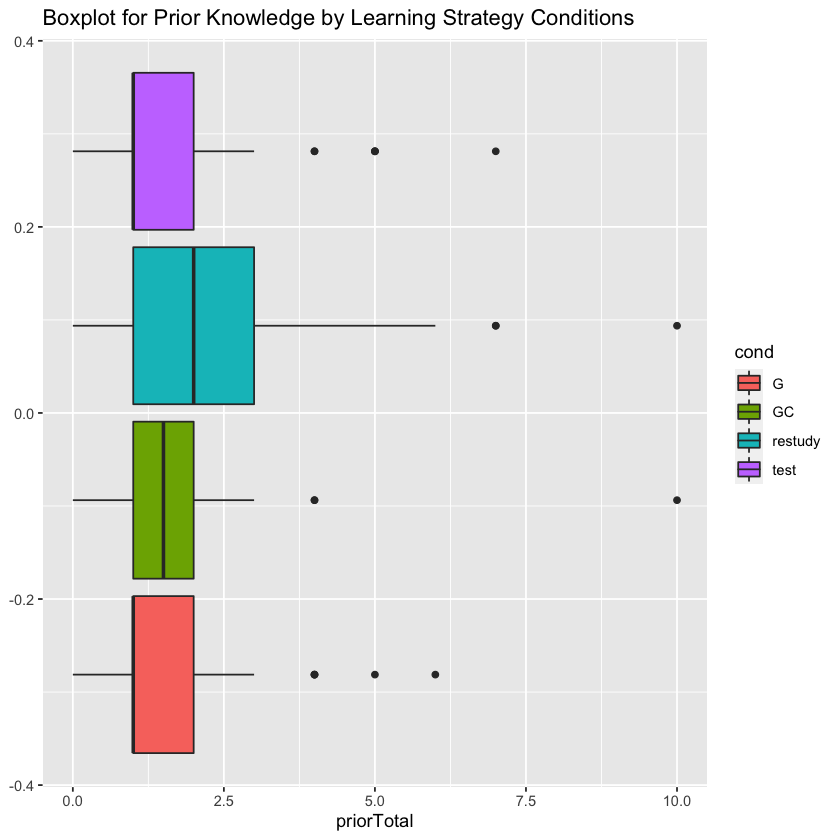

In [7]:
#Exclude those with too much prior knowledge
#Known coding
#"eukaryotes"   6 
#"studebaker"   10 
#"GUM"          15 
#"gymnosperms"  7  
# "thalassemia" 18
#"contrapposto" 20 
#"camelopard"   22 
# "bernoulli’s" 9   
# "hovercraft"  21 
# "ellipsoidal" 23 

#"studebaker",	"bernoulli’s",	"camelopard",	"contrapposto",	"gymnosperms",	"thalassemia",	"GUM",	"hovercraft",	"ellipsoidal",	"eukaryotes"

known.coding = c(10,9,22,20,7,18,15,21,23,6)

clean.df = clean.df %>% mutate(a1.o=0,
                               a2.o=0,
                               a3.o=0,
                               a4.o=0,
                               a5.o=0,
                               a6.o=0,
                               a7.o=0,
                               a8.o=0,
                               a9.o=0,	
                               a10.o=0)

out.indicators = c(clean.df$a1.o,clean.df$a2.o,clean.df$a3.o,clean.df$a4.o,clean.df$a5.o,clean.df$a6.o,clean.df$a7.o,clean.df$a8.o,clean.df$a9.o,clean.df$a10.o)
knowTooMuch = c()

for(i in 1:length(clean.df$known_coded)){ 
  knownOnes = as.numeric(unlist(str_split(clean.df$known_coded[i], ",")))
  out.index = which(known.coding %in% knownOnes )
  if(length(out.index)>4) {
    knowTooMuch = append(knowTooMuch, clean.df$workerId[i])
  }
  for (j in out.index){
    out.indicators[(j-1)*n+i] = 1
  }
}

clean.df = clean.df %>% mutate(a1.o=out.indicators[1:n],
                               a2.o=out.indicators[(n+1):(2*n)],
                               a3.o=out.indicators[(2*n+1):(3*n)],
                               a4.o=out.indicators[(3*n+1):(4*n)],
                               a5.o=out.indicators[(4*n+1):(5*n)],
                               a6.o=out.indicators[(5*n+1):(6*n)],
                               a7.o=out.indicators[(6*n+1):(7*n)],
                               a8.o=out.indicators[(7*n+1):(8*n)],
                               a9.o=out.indicators[(8*n+1):(9*n)],	
                               a10.o=out.indicators[(9*n+1):(10*n)])

clean.df = clean.df %>% mutate(a1.s = ifelse(a1.o==1,0,a1.rs)) %>% 
  mutate(a2.s = ifelse(a2.o>0, 0 ,a2.rs)) %>% 
  mutate(a3.s = ifelse(a3.o>0, 0 ,a3.rs)) %>% 
  mutate(a4.s = ifelse(a4.o>0, 0 ,a4.rs)) %>%
  mutate(a5.s = ifelse(a5.o>0, 0 ,a5.rs)) %>% 
  mutate(a6.s = ifelse(a6.o>0, 0 ,a6.rs)) %>% 
  mutate(a7.s = ifelse(a7.o>0, 0 ,a7.rs)) %>% 
  mutate(a8.s = ifelse(a8.o>0, 0 ,a8.rs)) %>% 
  mutate(a9.s = ifelse(a9.o>0, 0 ,a9.rs)) %>% 
  mutate(a10.s = ifelse(a10.o>0, 0 ,a10.rs))

"@" <- function(x,y) ifelse(y==0,0,base:::"/"(x,y))
"/" <- function(x,y) base:::"/"(x,y)


clean.df = clean.df %>% mutate(fscore = a1.s+a2.s+a3.s+a4.s+a5.s+a6.s+a7.s+a8.s+a9.s+a10.s, 
                               adjustedTotal = 10-(a1.o+a2.o+a3.o+a4.o+a5.o+a6.o+a7.o+a8.o+a9.o+a10.o),
                               priorTotal = a1.o+a2.o+a3.o+a4.o+a5.o+a6.o+a7.o+a8.o+a9.o+a10.o,
                               acc = fscore@adjustedTotal) 
clean.df %>% ggplot(aes(x=priorTotal, fill=cond)) + geom_boxplot() + ggtitle("Boxplot for Prior Knowledge by Learning Strategy Conditions")


clean.df = clean.df %>% filter(!(workerId %in% knowTooMuch))
#length(knowTooMuch) #14



**Exclude participants who did not follow the the instruction for at least 70% of the learning material** 

In [8]:
#exclude G/GC participants whose answer are not >7
notEnoughLookupG = c()
notEnoughLookupGC = c()

Gcond = clean.df %>% filter(cond == "G")
GCcond = clean.df %>% filter(cond == "GC") 
G.out = Gcond %>%filter(as.numeric(GLookup) <= 7) %>% select(workerId)
GC.out = GCcond %>% filter(as.numeric(GCLookup) <= 7) %>% select(workerId)
for (i in G.out) {
  notEnoughLookupG = append(i, notEnoughLookupG)
}

for (i in GC.out) {
  notEnoughLookupGC = append(i, notEnoughLookupGC)
}

clean.df = clean.df %>% filter(!(workerId %in% notEnoughLookupG)) %>% filter(!(workerId %in% notEnoughLookupGC))
#length(notEnoughLookupG) #11
#length(notEnoughLookupGC) #10



**Exclude participants who used external aid in completing the final assessment**

In [9]:
#exclude used external aid
aided = c()
aid.out = clean.df %>% filter(externalAid == "Yes") %>% select(workerId)
for (i in aid.out) {
  aided = append(i, aided)
}
clean.df = clean.df %>% filter(!(workerId %in% aided))
#length(aided) #1



**Exclude participants whose offTask time was an outlier within their respective learning condition**

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


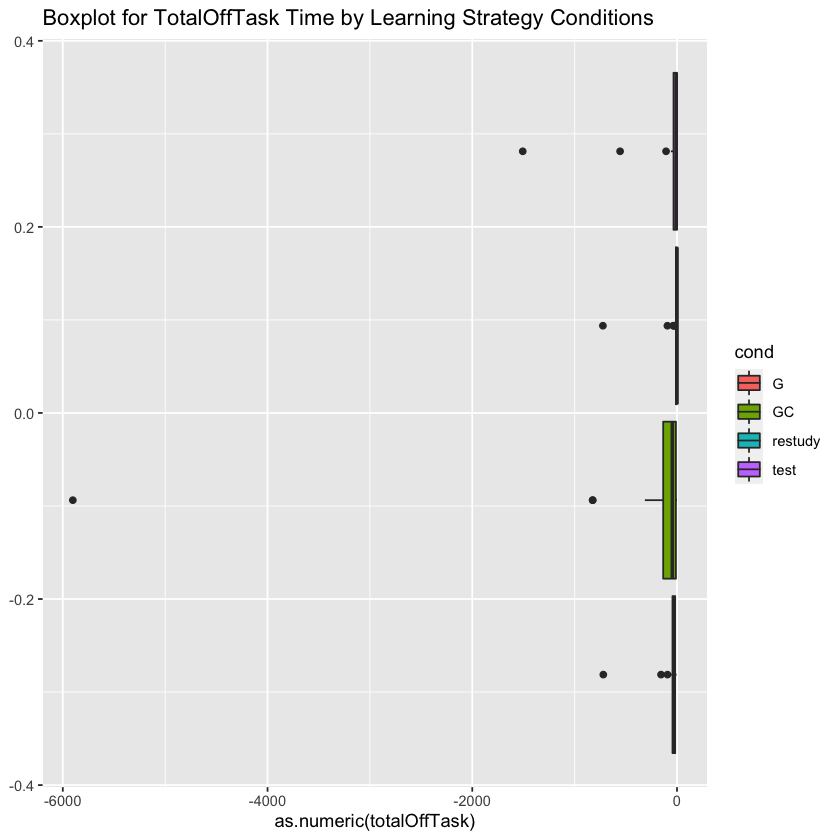

In [ ]:
#exclude outlier offTask time
ggplot(clean.df, aes(x=as.numeric(totalOffTask), fill = cond)) + geom_boxplot() + ggtitle("Boxplot for TotalOffTask Time by Learning Strategy Conditions")
Gcond = clean.df %>% filter(cond == "G")
GCcond = clean.df %>% filter(cond == "GC")
Tcond = clean.df %>% filter(cond == "test")
Rcond = clean.df %>% filter(cond == "restudy")

GoffTask.out = boxplot.stats(as.numeric(Gcond$totalOffTask))$out
GCoffTask.out = boxplot.stats(as.numeric(GCcond$totalOffTask))$out
ToffTask.out = boxplot.stats(as.numeric(Tcond$totalOffTask))$out
RoffTask.out = boxplot.stats(as.numeric(Rcond$totalOffTask))$out

off.g = Gcond %>% filter(as.numeric(totalOffTask) %in% GoffTask.out) %>% select(workerId)
off.gc = GCcond %>% filter(as.numeric(totalOffTask) %in% GCoffTask.out) %>% select(workerId)
off.t = Tcond %>% filter(as.numeric(totalOffTask) %in% ToffTask.out) %>% select(workerId)
off.r = Rcond %>% filter(as.numeric(totalOffTask) %in% RoffTask.out) %>% select(workerId)

outliers = findOutWorkerId(off.g)
#length(outliers) #3
outliers = append(outliers, findOutWorkerId(off.gc))
#length(outliers) #3
outliers = append(outliers, findOutWorkerId(off.t))
#length(outliers) #3
outliers = append(outliers, findOutWorkerId(off.r))
#length(outliers) #5

clean.df = clean.df %>% filter(!(workerId %in% outliers)) %>% 
  mutate_at(c("finalScorePredict","diff_material", "times_searchEngine",
              "opinion_on_testlearning","diff_test","priorKnow",
              "phone", "computer", "tablet", 
              "LearningStyle","openBookExam",
              "pt2_m1",	"pt2_m2",	"pt2_m3",	"pt2_m4",	"pt2_m5",	"pt2_m6",	"pt2_m7",	"pt2_m8",	"pt2_m9",	"pt2_m10",	"pt2_m11",	"pt2_m12",	"pt2_m13",	"pt2_m14",	"pt2_m15",	"pt2_m16",	"pt2_m17",	"pt2_m18",	"pt2_m19",	"pt2_m20",	"pt2_m21",	"pt2_m22",	"pt2_m23",	"pt2_m24",
              "pt1_m1",	"pt1_m2",	"pt1_m3",	"pt1_m4",	"pt1_m5",	"pt1_m6",	"pt1_m7",	"pt1_m8",	"pt1_m9",	"pt1_m10",	"pt1_m11",	"pt1_m12",	"pt1_m13",	"pt1_m14",	"pt1_m15",	"pt1_m16",	"pt1_m17",	"pt1_m18",	"pt1_m19",	"pt1_m20",	"pt1_m21",	"pt1_m22",	"pt1_m23",	"pt1_m24"),
            as.numeric)

clean.df$times_searchEngine[is.na(clean.df$times_searchEngine)] <- 7.5
#length(outliers) #14

#var adjustments
eduSeparated = model.matrix( ~ edu - 1, data=clean.df)
colnames(eduSeparated) <- c("Associate","Bachelor","Doctorate","HS","Master","someCollege")
ethnicitySeparated = model.matrix( ~ ethnicity - 1, data=clean.df)
colnames(ethnicitySeparated) <- c("AAPI","Black","Hispanic","Other","White")
condSeparated = model.matrix( ~ cond - 1, data=clean.df)
colnames(condSeparated) <- c("G","GC","R","T")
clean.df = cbind(clean.df,condSeparated,eduSeparated,ethnicitySeparated)
#add var for sum of math questions answered for each part
clean.df = mutate(clean.df, pt1A = rowSums(!is.na(select(clean.df, c("pt1_m1",	"pt1_m2",	"pt1_m3",	"pt1_m4",	"pt1_m5",	"pt1_m6",	"pt1_m7",	"pt1_m8",	"pt1_m9",	"pt1_m10",	"pt1_m11",	"pt1_m12",	"pt1_m13",	"pt1_m14",	"pt1_m15",	"pt1_m16",	"pt1_m17",	"pt1_m18",	"pt1_m19",	"pt1_m20",	"pt1_m21",	"pt1_m22",	"pt1_m23",	"pt1_m24")))))
clean.df = mutate(clean.df, pt2A = rowSums(!is.na(select(clean.df, c("pt2_m1",	"pt2_m2",	"pt2_m3",	"pt2_m4",	"pt2_m5",	"pt2_m6",	"pt2_m7",	"pt2_m8",	"pt2_m9",	"pt2_m10",	"pt2_m11",	"pt2_m12",	"pt2_m13",	"pt2_m14",	"pt2_m15",	"pt2_m16",	"pt2_m17",	"pt2_m18",	"pt2_m19",	"pt2_m20",	"pt2_m21",	"pt2_m22",	"pt2_m23",	"pt2_m24")))))

write.csv(clean.df, "cleanreadyforA.csv")

### Final Data Table Going into Analysis

In [ ]:
head(clean.df)

### Statistical Analyses:
  - T-tests
  - Correlation Matrices 
  - Linear Model
  - Cross-Validation Analysis
  - Permutation Tests
  - Bootstrapping
  - Bayes Factor Analysis

# Analysis

### T-tests

**Visualizations**

In [ ]:
Gcond = clean.df %>% filter(cond == "G")
GCcond = clean.df %>% filter(cond == "GC")
Tcond = clean.df %>% filter(cond == "test")
Rcond = clean.df %>% filter(cond == "restudy")

ggplot(clean.df, aes(x=acc, fill = cond)) + geom_boxplot()+ggtitle("Boxplot for Final Assessment Accuracy by Testing Strategy Condition")
ggplot(clean.df, aes(x=cond, y=acc, fill = cond)) + geom_violin()+ggtitle("Violin Plot for Final Assessment Accuracy by Testing Strategy Condition")

**T-test assumption checks**

In [ ]:
library(rstatix)
#clean.df %>% group_by(cond) %>% identify_outliers(acc) #no outliers
clean.df %>% group_by(cond) %>% shapiro_test(acc)
clean.df %>% levene_test(acc ~ cond)

In [ ]:
t.test(Gcond$acc,GCcond$acc, var.equal = TRUE)
t.test(Gcond$acc,Tcond$acc, var.equal = TRUE)
t.test(Gcond$acc,Rcond$acc, var.equal = TRUE)
t.test(GCcond$acc,Tcond$acc, var.equal = TRUE)
t.test(GCcond$acc,Rcond$acc, var.equal = TRUE)
t.test(Tcond$acc,Rcond$acc, var.equal = TRUE)

The check of equal variance assumption using Levene’s Homogeneity of Variances Test was met (F(3,99) = 0.333, p = 0.801). The test of normality with Shapiro-Wilk also passed. Overall,
Participants who were tested in phase 2 had the best accuracy (M = 0.487, SD = 0.239), followed by those who restudied (M = 0.441, SD = 0.236) then those who were in the Google (M = 0.437, SD = 0.264) and GC condition (M = 0.437, SD = 0.278). None of the learning conditions differed significantly from each other. This result does not provide support to the hypothesis that learning with Google gives the best retention after the delay.

**Exploration Analyses by Collapsing the Learning Strategy Conditions**

In [ ]:
# collapse Google
Googlecond = clean.df %>% filter(cond == "G" | cond == "GC")

t.test(Googlecond$acc,Rcond$acc)
t.test(Tcond$acc,Googlecond$acc)
sd(Googlecond$acc)
sd(Rcond$acc)
sd(Tcond$acc)

#collapse except Test
noTcond = clean.df %>% filter(!(cond == "T"))
t.test(Tcond$acc,noTcond$acc)
sd(Tcond$acc)
sd(noTcond$acc)

Some exploration analyses were done by collapsing across learning conditions hoping to gain more power and uncover possible significant differences among the groups. First, we collapsed the two Google conditions together. The new GOOGLE condition still has the worst accuracy (M = 0.437, SD = 0.268); there was no significant difference when it’s compared to the testing condition (M = 0.487, SD = 0.239) (t(71.758) = 0.852, p = .397) and the restudying condition (M = 0.441, SD = 0.236) (t(62.741) = -0.062, p = .950). 

To isolate the testing condition with the best performance, we also collapsed the GC, Google, and restudying conditions into one group. The testing condition (M = 0.487, SD = 0.239) remains to be better than the big group (M = 0.454, SD = 0.249) though the difference being insignificant, t(56.004) = 0.6816, p = .498. 

Collapsing across learning conditions did not change any of the trends we observed from the uncollapsed data nor led us to any significant differences. Again, our hypothesis was not supported; learning with Google did not show an advantage in retention compared to the other learning strategies.

### Linear Model

In [ ]:
#linear model
lms.fit = lm(acc~cond, data=clean.df)
summary(lms.fit)


lmm.fit = lm(acc~cond+
             gender+ethnicity+edu+
             LearningStyle+openBookExam+opinion_on_testlearning+
             Gdefault+times_searchEngine+phone+computer+tablet+
             pt1A+pt2A+
             priorKnow+finalScorePredict+diff_material+diff_test, data=clean.df)
summary(lmm.fit)


When no control variables were added, we see again none of the learning strategy conditions were a significant predictor of the final assessment's accuracy. 

When we added in all the control variables, however, the testing condition became a significant predictor for the final assessment accuracy along with difficulty rating of the final assessment, prediction of the final assessment score, Master's education, and Bachelor's education.

### Bootstrapping

In [ ]:
#Bootstrapping
library(boot)
#code adapted from https://coaxlab.github.io/Data-Explorations/notebooks/resampling-methods.html
boot.fn <- function(data, index){  
    # return: throw this as output
    # coef: extract coefficients from model object 
    return(coef(lm(acc~cond, data=clean.df, subset=index)))
}
boot_obj = boot(clean.df, boot.fn, R=1000)
print(boot_obj)
hist(boot(clean.df ,boot.fn ,R=1000)$t[,2], xlab="Learning Condition Coefficient")
abline(v=0.0001704545)
hist(boot(clean.df ,boot.fn ,R=1000)$t[,3], xlab="Learning Condition Coefficient") 
abline(v=0.0038793548)
hist(boot(clean.df ,boot.fn ,R=1000)$t[,4], xlab="Learning Condition Coefficient")  
abline(v=0.0500721501)

We see a similarity in the parametric estimate and the bootstrapped estimate for coefficients of the learning conditions. This means given the variability in the data, the coefficient estimates are actually quite robust. 

### Permutation Testing

In [ ]:
#Permutation Testing
#code adapted from https://coaxlab.github.io/Data-Explorations/notebooks/resampling-methods.html
permdf = clean.df #want to preserve the non-permuted, true form of data!

# Set the number of iterations
R=1000

# Next smake an output object to store the results
perm.coefs=matrix(NA,nrow=R, ncol=4) #filling with nas at first

# Now just write a for loop where we scramble the observations
# in X using the sample() function. We'll scramble the observations in R different ways
for (i in 1:R){
  permdf$cond=clean.df$cond[sample(103)] # This is a shuffled version of the Auto$horsepower vector
  perm.coefs[i,]=coef(lm(acc~cond, data=permdf)) # then we get coefficients for linear model of shuffled horsepower to auto
}

# Take a look at the null distributions
perm.real = coef(lm(acc~cond,data=clean.df))
hist(perm.coefs[,2])
perm.p = sum(perm.coefs[,2]<perm.real[2])/R 
perm.p

hist(perm.coefs[,3])
perm.p = sum(perm.coefs[,3]<perm.real[3])/R 
perm.p

hist(perm.coefs[,4])
perm.p = sum(perm.coefs[,4]<perm.real[4])/R 
perm.p



Through permutation tests, we see the relationship between learning strategy condition and final assessment accuracy is not stronger than randomly shuffled pairings of these variables' observations. We see the coefficients falling inside the ranges. In addition, there are decent probabilities (49.4%, 52.6%, 75.5%) of seeing stronger coefficients from randomly shuffled pairings of the variables indicating the null relationship between learning strategy condition and final assessment accuracy. So, again, there is no evidence supporting our hypothesis. 

### Bayes Factor

In [ ]:
library(BayesFactor)
bf1 = ttestBF(x = Gcond$acc, y = GCcond$acc)
bf1
1/bf1

bf2 = ttestBF(x = Gcond$acc, y = Tcond$acc)
bf2
1/bf2

bf3 = ttestBF(x = Gcond$acc, y = Rcond$acc)
bf3
1/bf3

bf4 = ttestBF(x = Tcond$acc, y = GCcond$acc)
bf4
1/bf4

bf5 = ttestBF(x = Rcond$acc, y = GCcond$acc)
bf5
1/bf5

bf6 = ttestBF(x = Tcond$acc, y = Rcond$acc)
bf6
1/bf6

Using Bayes Factors, we then tested the evidence for alternative hupotheses where there are no difference among the different learning conditions' accuracy. We see that in all cases, there were stronger evidence for the null hypothesis suggesting (around 3) no difference among the groups than the alternative hypothesis (around 0.3).

### Model Selection - Best Subset

In [ ]:
#model selection
#code adpated from https://coaxlab.github.io/Data-Explorations/notebooks/selecting-the-best-model.html
library(leaps)
regfit.full = regsubsets(acc~., select(clean.df, c(acc,cond,gender,ethnicity,edu,
                                                   diff_test,diff_material,finalScorePredict,priorKnow,
                                                   LearningStyle,openBookExam,opinion_on_testlearning,
                                                   Gdefault,times_searchEngine,phone,computer,tablet,
                                                   pt1A,pt2A)))

reg.summary = summary(regfit.full)
reg.summary$which
reg.summary

numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

which.min(reg.summary$bic) 
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)


#original hypothesis
glm.fit = glm(acc~cond, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#5
glm.fit = glm(acc~T+Bachelor+diff_test+finalScorePredict+phone, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#8
glm.fit = glm(acc~pt2A+phone+LearningStyle+finalScorePredict+diff_test+Bachelor+White+T, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#6
glm.fit = glm(acc~White+Bachelor+diff_test+phone+finalScorePredict+T, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

**Backward Selection**

In [ ]:
#model selection, backward
#code adapted from https://coaxlab.github.io/Data-Explorations/notebooks/selecting-the-best-model.html
regfit.full = regsubsets(acc~., select(clean.df, c(acc,cond,gender,ethnicity,edu,
                                                   diff_test,diff_material,finalScorePredict,priorKnow,
                                                   LearningStyle,openBookExam,opinion_on_testlearning,
                                                   Gdefault,times_searchEngine,phone,computer,tablet,
                                                   pt1A,pt2A)), method = "backward")

reg.summary = summary(regfit.full)
reg.summary$which
reg.summary

numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

which.min(reg.summary$bic) 
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)

#original hypothesis
glm.fit = glm(acc~cond, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#5
glm.fit = glm(acc~T+diff_test+Bachelor+finalScorePredict+phone, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#8
glm.fit = glm(acc~T+diff_test+Bachelor+finalScorePredict+phone+White+opinion_on_testlearning+pt2A, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#6
glm.fit = glm(acc~T+diff_test+Bachelor+finalScorePredict+phone+White, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

**Forward Selection**

In [ ]:
#model selection, forward
#code adpated from https://coaxlab.github.io/Data-Explorations/notebooks/selecting-the-best-model.html
regfit.full = regsubsets(acc~., select(clean.df, c(acc,cond,gender,ethnicity,edu,
                                                   diff_test,diff_material,finalScorePredict,priorKnow,
                                                   LearningStyle,openBookExam,opinion_on_testlearning,
                                                   Gdefault,times_searchEngine,phone,computer,tablet,
                                                   pt1A,pt2A)), method = "forward")

reg.summary = summary(regfit.full)
reg.summary$which
reg.summary

numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

which.min(reg.summary$bic) 
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)

#original hypothesis
glm.fit = glm(acc~cond, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#5
glm.fit = glm(acc~Bachelor+diff_test+finalScorePredict+phone+T, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#8
glm.fit = glm(acc~pt2A+phone+finalScorePredict+diff_test+LearningStyle+T+White+Bachelor, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

#6
glm.fit = glm(acc~White+Bachelor+diff_test+finalScorePredict+phone+T, data=clean.df)
cv.err = cv.glm(clean.df, glm.fit, K=nrow(clean.df))
cv.err$delta

With discrepancy in fit among the bias-adjusted model evaluations, I used cross-validation to determine which model is the best. Overall, it seems that a model with 6 variables is the best, including testing condtion, White ethnicity, Bachelor's degree, difficuty rating of the test, prediction of final score and average daily phone usage. 

# Conclusion

Contrary to our hypothesis, learning with Google did not give better learning outcomes compared to learning by restudying and learning by testing. In fact, through T-tests, linear models and Bayes Factors, no evidence was found supporting that learning conditions, in general, made a difference for the final assessment accuracy. From best subset model selection and linear model with control variables, we discovered some variables that are important in predicting the final assessment accuracy including people's education level, their ethnicity, their prediction for the final assessment score and how difficult they rate the final assessment to be. Interestingly, though the testing condition did not significantly differ from the rest of the studying conditions in terms of final assessment accuracy, it was flagged being important in the linear model and subset selection. This is consistent with the testing effect largely studied by scholars. Future studies can look into these other variables in exploring the exact mechanism driving the testing effect or any learning strategy's benefit in long term retention. All in all, we did not find an advantage for using Google to learn. Educators and educational institutions should be cautious in the usage of Google as an educational tool in their curricula. 